In [2]:
# Lasso Regression with Hyperparameter Tuning, Cross-Validation, and Holdout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

In [4]:
# Load dataset
df = pd.read_csv("cleaned_data_more_features_filtered.csv")
X = df.drop(columns=["calories"])
y = df["calories"]

In [6]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
# ---------------------- Hyperparameter Tuning (All Features) ----------------------
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]
r2_scores, mae_scores, rmse_scores = [], [], []

print("----- Hyperparameter Tuning Results (All Features) -----")
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    print(f"Alpha = {alpha}")
    print(f"  R² Score = {r2_scores[-1]:.6f}")
    print(f"  MAE = {mae_scores[-1]:.2f}")
    print(f"  RMSE = {rmse_scores[-1]:.2f}")
    print("-" * 30)


----- Hyperparameter Tuning Results (All Features) -----
Alpha = 0.0001
  R² Score = 0.994642
  MAE = 13.59
  RMSE = 50.65
------------------------------
Alpha = 0.001
  R² Score = 0.994642
  MAE = 13.59
  RMSE = 50.65
------------------------------
Alpha = 0.01
  R² Score = 0.994642
  MAE = 13.58
  RMSE = 50.65
------------------------------
Alpha = 0.1
  R² Score = 0.994639
  MAE = 13.57
  RMSE = 50.67
------------------------------
Alpha = 1
  R² Score = 0.994628
  MAE = 13.66
  RMSE = 50.72
------------------------------
Alpha = 10
  R² Score = 0.994266
  MAE = 16.80
  RMSE = 52.40
------------------------------


----- Lasso Hyperparameter Tuning -----
Alpha = 1e-05
  R² = 0.994642
  MAE = 13.59
  RMSE = 50.65
  Features kept = 9/9
----------------------------------------
Alpha = 0.0001
  R² = 0.994642
  MAE = 13.59
  RMSE = 50.65
  Features kept = 9/9
----------------------------------------
Alpha = 0.001
  R² = 0.994642
  MAE = 13.59
  RMSE = 50.65
  Features kept = 9/9
----------------------------------------
Alpha = 0.01
  R² = 0.994642
  MAE = 13.58
  RMSE = 50.65
  Features kept = 9/9
----------------------------------------
Alpha = 0.1
  R² = 0.994639
  MAE = 13.57
  RMSE = 50.67
  Features kept = 8/9
----------------------------------------
Alpha = 1
  R² = 0.994628
  MAE = 13.66
  RMSE = 50.72
  Features kept = 5/9
----------------------------------------
Alpha = 10
  R² = 0.994266
  MAE = 16.80
  RMSE = 52.40
  Features kept = 3/9
----------------------------------------


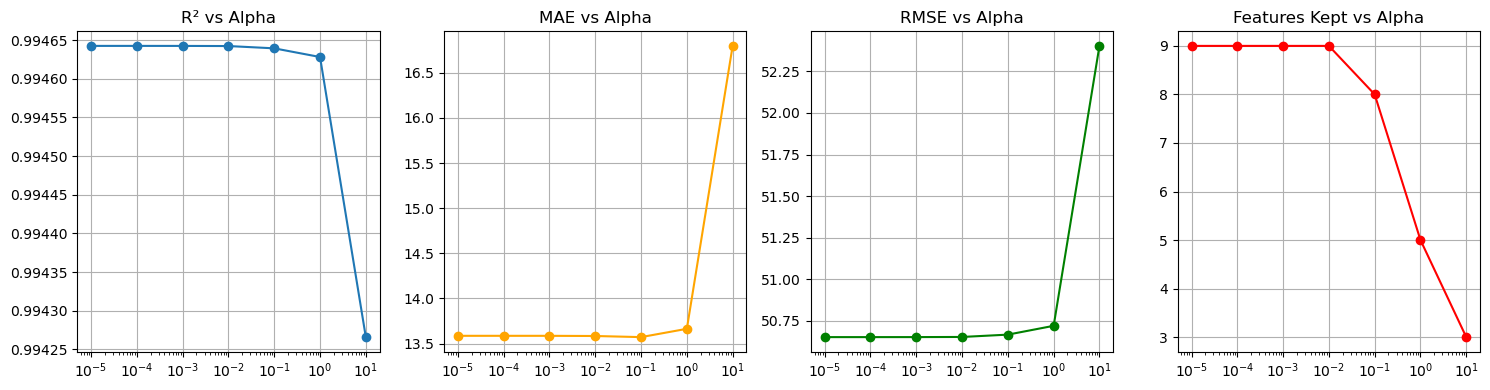

In [17]:
# ------------------------
# 2. Hyperparameter Tuning (All Features) - FIXED VERSION
# ------------------------
# Lasso typically needs smaller alphas than Ridge
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
r2_scores = []
mae_scores = []
rmse_scores = []
non_zero_coefs = []  # Initialize list to track feature selection

print("----- Lasso Hyperparameter Tuning -----")
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    
    # Store metrics
    r2_scores.append(r2_score(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    non_zero_coefs.append(np.sum(lasso.coef_ != 0))  # Count non-zero coefficients
    
    print(f"Alpha = {alpha}")
    print(f"  R² = {r2_scores[-1]:.6f}")
    print(f"  MAE = {mae_scores[-1]:.2f}")
    print(f"  RMSE = {rmse_scores[-1]:.2f}")
    print(f"  Features kept = {non_zero_coefs[-1]}/{X.shape[1]}")
    print("-" * 40)

# ------------------------
# 3. Visualization of Tuning Results - NOW WILL WORK
# ------------------------
plt.figure(figsize=(15, 4))

# R² plot
plt.subplot(1, 4, 1)
plt.plot(alphas, r2_scores, marker='o')
plt.xscale('log')
plt.title('R² vs Alpha')
plt.grid(True)

# MAE plot
plt.subplot(1, 4, 2)
plt.plot(alphas, mae_scores, marker='o', color='orange')
plt.xscale('log')
plt.title('MAE vs Alpha')
plt.grid(True)

# RMSE plot
plt.subplot(1, 4, 3)
plt.plot(alphas, rmse_scores, marker='o', color='green')
plt.xscale('log')
plt.title('RMSE vs Alpha')
plt.grid(True)

# Feature selection plot
plt.subplot(1, 4, 4)
plt.plot(alphas, non_zero_coefs, marker='o', color='red')
plt.xscale('log')
plt.title('Features Kept vs Alpha')
plt.grid(True)

plt.tight_layout()
plt.show()

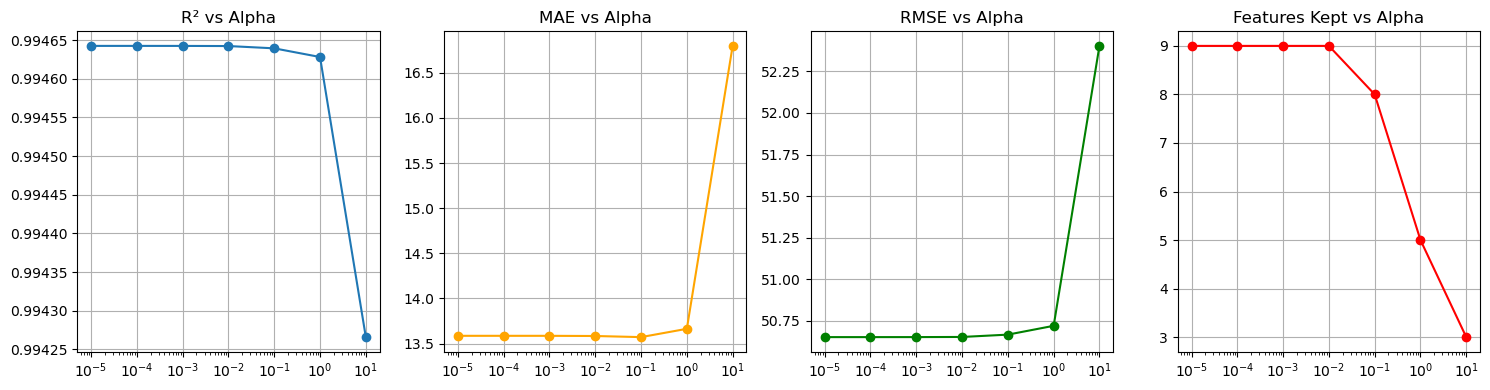

In [19]:
# ------------------------
# 3. Visualization of Tuning Results
# ------------------------
plt.figure(figsize=(15, 4))

# R² plot
plt.subplot(1, 4, 1)
plt.plot(alphas, r2_scores, marker='o')
plt.xscale('log')
plt.title('R² vs Alpha')
plt.grid(True)

# MAE plot
plt.subplot(1, 4, 2)
plt.plot(alphas, mae_scores, marker='o', color='orange')
plt.xscale('log')
plt.title('MAE vs Alpha')
plt.grid(True)

# RMSE plot
plt.subplot(1, 4, 3)
plt.plot(alphas, rmse_scores, marker='o', color='green')
plt.xscale('log')
plt.title('RMSE vs Alpha')
plt.grid(True)

# Feature selection plot
plt.subplot(1, 4, 4)
plt.plot(alphas, non_zero_coefs, marker='o', color='red')
plt.xscale('log')
plt.title('Features Kept vs Alpha')
plt.grid(True)

plt.tight_layout()
plt.show()


--- Final Lasso Model (All Features) ---
Best alpha: 0.0001
R²: 0.994642
MAE: 13.59
RMSE: 50.65
Features kept: 9/9
Fit time: 0.2227s, Predict time: 0.0010s


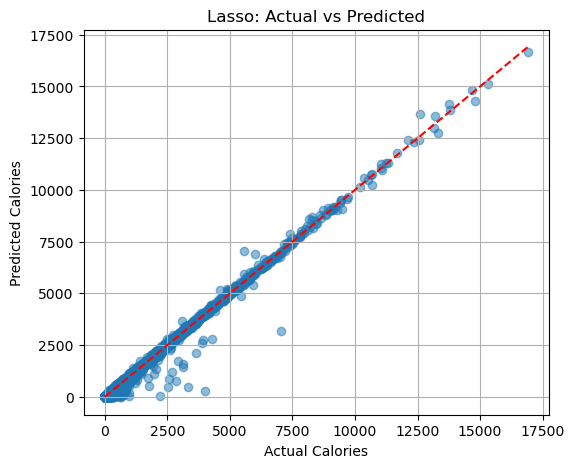

In [22]:
# ------------------------
# 4. Final Model Evaluation (All Features)
# ------------------------
# Select best alpha based on your results
best_alpha = 0.0001  # Example - adjust based on your tuning results

final_lasso = Lasso(alpha=best_alpha, max_iter=10000)
start_time = time.time()
final_lasso.fit(X_train, y_train)
fit_time = time.time() - start_time

start_time = time.time()
y_pred = final_lasso.predict(X_test)
score_time = time.time() - start_time

print("\n--- Final Lasso Model (All Features) ---")
print(f"Best alpha: {best_alpha}")
print(f"R²: {r2_score(y_test, y_pred):.6f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"Features kept: {np.sum(final_lasso.coef_ != 0)}/{X.shape[1]}")
print(f"Fit time: {fit_time:.4f}s, Predict time: {score_time:.4f}s")

# Plot actual vs predicted
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Lasso: Actual vs Predicted")
plt.grid(True)
plt.show()

In [24]:
# ------------------------
# 5. Feature Analysis
# ------------------------
# Get selected features and their coefficients
selected_features = X.columns[final_lasso.coef_ != 0]
coef_values = final_lasso.coef_[final_lasso.coef_ != 0]

print("\n--- Selected Features and Coefficients ---")
for feature, coef in zip(selected_features, coef_values):
    print(f"{feature}: {coef:.4f}")

# Compare with SelectKBest (like your colleague did)
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X_scaled, y)
top_features = X.columns[selector.get_support()]

print("\nTop 5 Features by SelectKBest:", list(top_features))


--- Selected Features and Coefficients ---
total_fat: 363.1213
sugar: 1.9874
sodium: -0.8294
protein: 111.7787
saturated_fat: -1.3433
carbohydrates: 346.3009
minutes: -0.0388
n_steps: 0.5791
n_ingredients: -2.1402

Top 5 Features by SelectKBest: ['total_fat', 'sugar', 'protein', 'saturated_fat', 'carbohydrates']


In [26]:
# Train model using only features selected by Lasso
X_train_selected = X_train[:, final_lasso.coef_ != 0]
X_test_selected = X_test[:, final_lasso.coef_ != 0]

selected_model = Lasso(alpha=best_alpha, max_iter=10000)
selected_model.fit(X_train_selected, y_train)
y_pred_selected = selected_model.predict(X_test_selected)

print("\n--- Lasso Model (Selected Features Only) ---")
print(f"R²: {r2_score(y_test, y_pred_selected):.6f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_selected):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_selected)):.2f}")


--- Lasso Model (Selected Features Only) ---
R²: 0.994642
MAE: 13.59
RMSE: 50.65


In [28]:
# ------------------------
# 7. Sample Prediction Comparison
# ------------------------
index = 0  # First test sample
sample_all = X_test[index].reshape(1, -1)
sample_selected = X_test_selected[index].reshape(1, -1)

pred_all = final_lasso.predict(sample_all)[0]
pred_selected = selected_model.predict(sample_selected)[0]
actual = y_test.iloc[index]

print("\n--- Sample Prediction Comparison ---")
print(f"Actual calories: {actual:.2f}")
print(f"Prediction (all features): {pred_all:.2f}")
print(f"Prediction (selected features): {pred_selected:.2f}")


--- Sample Prediction Comparison ---
Actual calories: 252.80
Prediction (all features): 253.29
Prediction (selected features): 253.29
